In [4]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model,Model
from keras.layers import Dense,Dropout,BatchNormalization,Flatten,Input,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split

2023-12-05 19:55:52.606523: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data and get labels

In [9]:
path='UTKFace'
images=[]
age=[]
gender=[]
for img in os.listdir(path):
    ages=img.split("_")[0]
    genders=img.split("_")[1]
    img=cv2.imread(str(path)+'/'+str(img))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(np.array(img))
    age.append(np.array(ages))
    gender.append(np.array(genders))


In [10]:
len(images),len(age),len(gender),type(gender)

(23708, 23708, 23708, list)

(<matplotlib.image.AxesImage at 0x7f8141e55280>, (200, 200, 3))

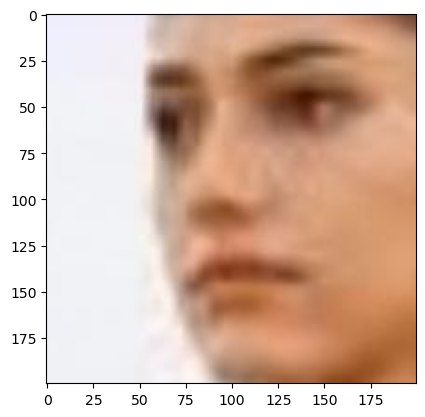

In [11]:
plt.imshow(images[3]),images[3].shape

In [12]:
age=np.array(age,dtype=np.int64)
images=np.array(images)
images=images/255
gender=np.array(gender,dtype=np.uint64)

In [13]:
age

array([ 9, 36, 86, ..., 26, 28, 50])

In [14]:
type(gender)

numpy.ndarray

In [15]:
images[3].shape

(200, 200, 3)

## Train-Test Split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(images,age,random_state=42)

## Model 

In [10]:
model_age=Sequential()
model_age.add(Conv2D(64,kernel_size=(3,3),activation='relu',
                input_shape=(200,200,3)))
model_age.add(MaxPooling2D(pool_size=(2,2)))

model_age.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model_age.add(MaxPooling2D(pool_size=(2,2)))


model_age.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model_age.add(MaxPooling2D(pool_size=(2,2)))


model_age.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model_age.add(MaxPooling2D(pool_size=(2,2)))


model_age.add(Flatten())
model_age.add(Dense(256,activation='relu'))
model_age.add(Dropout(0.2))

model_age.add(Dense(1,activation='linear',name='age'))


In [12]:
model_age.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [13]:
model_age.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 256)      0

## Train Model

In [2]:
# history_age=model_age.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

## Save Model

In [ ]:
model_age.save('Age_Detection_CNN_05epochs.h5')

In [6]:
my_model=load_model('Age_Detection_CNN_05epochs.h5',compile=False)

## Prediction

In [17]:
y_pred=my_model.predict(X_test)

186/186 [==============================] - 141s 741ms/step


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7602426881183821

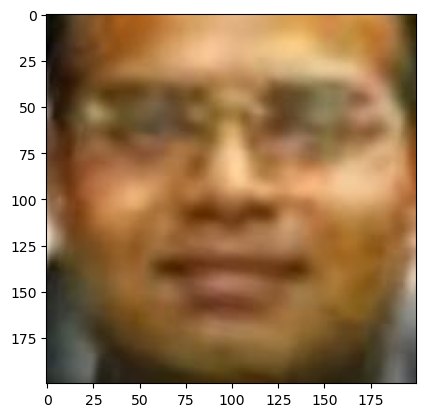

In [19]:
plt.imshow(X_test[5])

In [20]:
y_pred[y_pred>100]

array([105.484924, 101.55799 , 107.98535 , 113.87156 ], dtype=float32)

In [21]:
y_test[0]

8

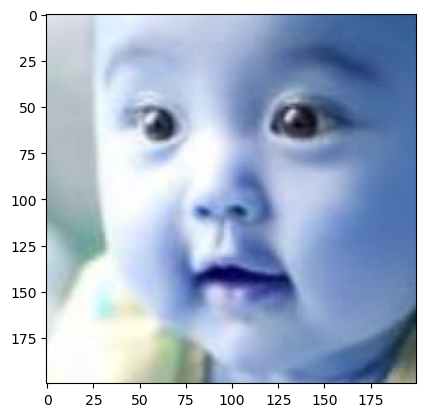

In [22]:
img=cv2.imread('im.jpg')
plt.imshow(img)

In [23]:
img=img/255

In [24]:
y_p=my_model.predict(np.array(img).reshape(1,200,200,3))

1/1 [==============================] - 0s 72ms/step


In [25]:
y_p

array([[1.8699579]], dtype=float32)